In [42]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

path = r"C:\Users\narea\Desktop\Dataset"
def findFiles(path): return glob.glob(path)
#데이터 불러오기

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision.datasets as dsets
import torchvision.transforms as transforms

from torch.utils.data import DataLoader

In [44]:
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
import random
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_list1 = [os.path.join(path, fname) for fname in os.listdir(path) if fname.endswith('.png')]
image_list2 = [os.path.join(path, fname) for fname in os.listdir(path) if fname.endswith('.jpg')]

image_list = image_list1+image_list2
transform = transforms.ToTensor()

dataset = []
labels = []

for idx in image_list:
    image = cv2.imread(idx, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (64,64))
    image = Image.fromarray(image)
    image = transform(image)
    dataset.append(image)

    filename = os.path.basename(idx).lower()
    if 'o' in filename:
        labels.append(0) #결과 레이블 'o'
    elif 'x' in filename:
        labels.append(1) #결과 레이블 'x'

print(f"dataset 배열 크기 : {len(dataset)}")
print(f"첫번째 원소값 사이즈: {dataset[0].size()}")

dataset 배열 크기 : 280
첫번째 원소값 사이즈: torch.Size([1, 64, 64])


In [45]:
num_epochs = 80
batch_size = 32
learning_rate = 0.001

In [46]:
labels = torch.tensor(labels, dtype=torch.long)

In [47]:
# 랜덤 시드 고정
seed = 42
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(list(zip(dataset, labels)), [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size, shuffle=False)

In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))

        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))

        self.conv3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2))

        self.fc = nn.Linear(64 * 8 * 8, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = x.view(x.size(0), -1) 
        x = self.fc(x)
        x = F.softmax(x, dim=1)  # Softmax 추가
        return x


In [49]:
model = CNN()
optimizer = optim.Adam(model.parameters(), lr=learning_rate) #0.001 정도가 제일 잘 나옴
criterion = nn.CrossEntropyLoss() #손실함수

In [50]:
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        
        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

        total_loss += loss.item()
    correct = 0
    total = 0
    with torch.no_grad():
        model.eval()
        for data in test_loader:
            images, labels = data
            outputs = model(images)

            predicted = torch.argmax(outputs, dim=1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = total_loss / len(train_loader)
    print(f'Result: {100 * correct / total}%')
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

Result: 76.78571428571429%
Epoch [1/80], Loss: 0.5815
Result: 67.85714285714286%
Epoch [2/80], Loss: 0.4645
Result: 80.35714285714286%
Epoch [3/80], Loss: 0.4312
Result: 89.28571428571429%
Epoch [4/80], Loss: 0.3984
Result: 87.5%
Epoch [5/80], Loss: 0.3827
Result: 91.07142857142857%
Epoch [6/80], Loss: 0.3642
Result: 91.07142857142857%
Epoch [7/80], Loss: 0.3472
Result: 92.85714285714286%
Epoch [8/80], Loss: 0.3355
Result: 91.07142857142857%
Epoch [9/80], Loss: 0.3269
Result: 94.64285714285714%
Epoch [10/80], Loss: 0.3261
Result: 92.85714285714286%
Epoch [11/80], Loss: 0.3221
Result: 92.85714285714286%
Epoch [12/80], Loss: 0.3218
Result: 94.64285714285714%
Epoch [13/80], Loss: 0.3201
Result: 94.64285714285714%
Epoch [14/80], Loss: 0.3183
Result: 94.64285714285714%
Epoch [15/80], Loss: 0.3176
Result: 94.64285714285714%
Epoch [16/80], Loss: 0.3166
Result: 94.64285714285714%
Epoch [17/80], Loss: 0.3158
Result: 94.64285714285714%
Epoch [18/80], Loss: 0.3156
Result: 94.64285714285714%
Epoch

In [51]:
correct = 0
total = 0
with torch.no_grad():  # torch.no_grad()를 하면 gradient 계산을 수행하지 않음
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Result: {100 * correct / total}%')

Result: 94.64285714285714%


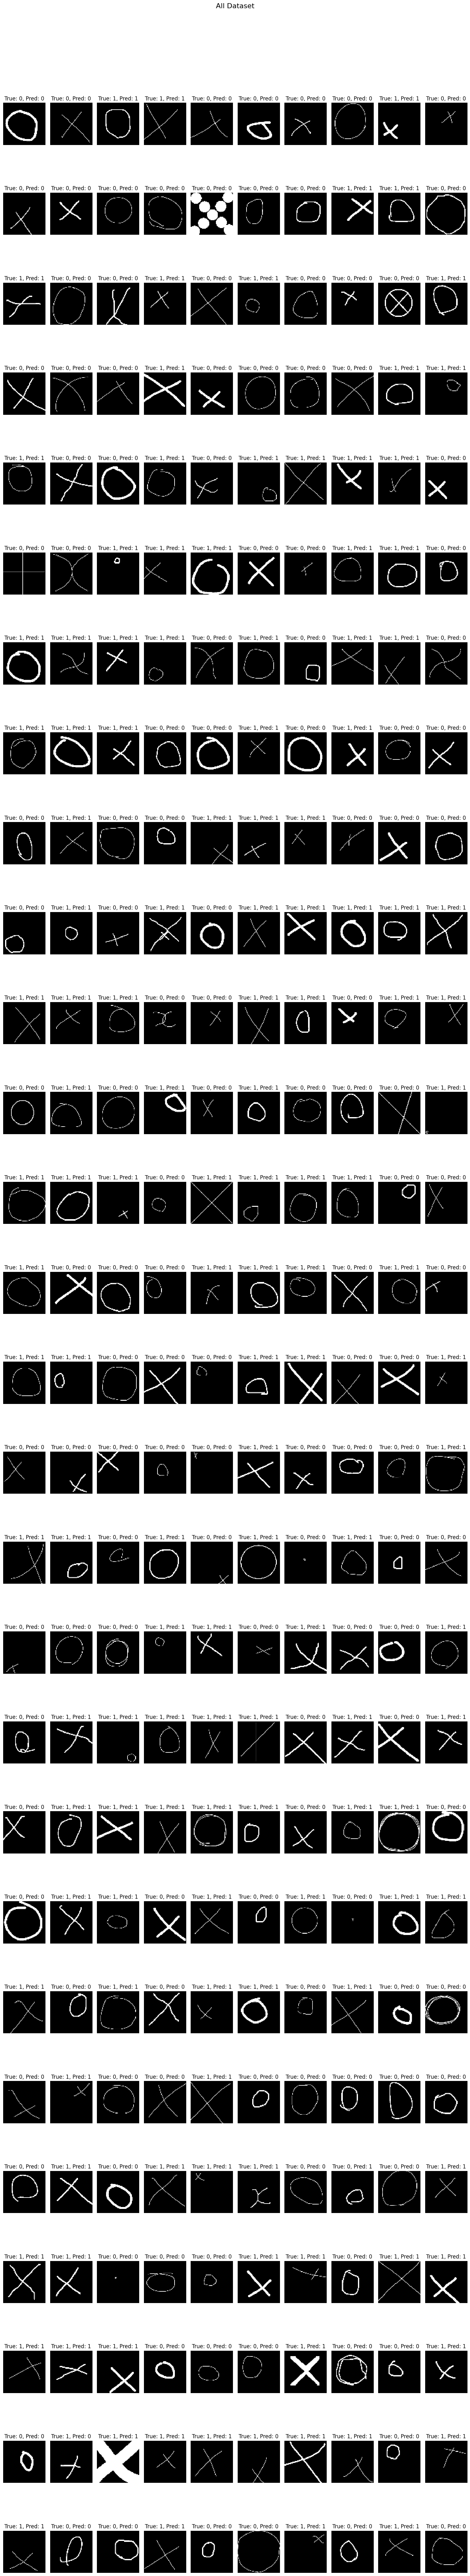

In [52]:
import matplotlib.pyplot as plt
import torch

# 예측 결과와 실제 결과를 담을 리스트
predicted_labels = []
true_labels = []

#모델 예측
with torch.no_grad():
    model.eval()
    
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        predicted = torch.argmax(outputs, dim=1)
        predicted_labels.extend(predicted.tolist()) #
        true_labels.extend(labels.tolist())

    for data in test_loader:
        images, labels = data
        outputs = model(images)
        predicted = torch.argmax(outputs, dim=1)
        predicted_labels.extend(predicted.tolist())
        true_labels.extend(labels.tolist())

#테스트랑 훈련 데이터의 이미지 리스트 합치기
all_images = [img for img, _ in train_dataset] + [img for img, _ in test_dataset]

# 시각화 함수 #챗gpt + 강의 코드 참조 
def visualize_dataset(images, true_labels, predicted_labels, dataset_type):
    num_images = len(images)
    num_cols = 10 #한 줄에 열 개씩
    num_rows = (num_images // num_cols) + 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

    for i, (image, true, predict) in enumerate(zip(images, true_labels, predicted_labels)):
        ax = axes[i // num_cols, i % num_cols]
        ax.imshow(image.squeeze().numpy(), cmap="Greys", interpolation="nearest")
        ax.set_title(f'True: {true}, Pred: {predict}')
        ax.axis('off')

    # 빈 서브플롯 제거 
    for i in range(num_images, num_rows * num_cols):
        fig.delaxes(axes[i // num_cols, i % num_cols])

    plt.suptitle(f'{dataset_type} Dataset', size=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# 전체 데이터셋 시각화
visualize_dataset(all_images, true_labels, predicted_labels, "All")


In [53]:
len(all_images)

280

In [54]:
torch.save(model, 'OXmodel.pth')